In [292]:
print("Hello welcome to the custom implementation of the polynomial regression")

Hello welcome to the custom implementation of the polynomial regression


In [293]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [294]:
X = 6 * np.random.rand(200, 1) - 3

In [295]:

y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)


y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)


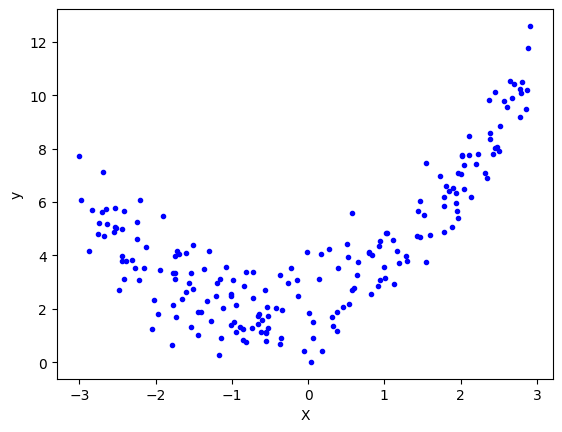

In [296]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [297]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [298]:
lr = LinearRegression()

In [299]:
lr.fit(X_train,y_train)

LinearRegression()

In [300]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.21975599274972069

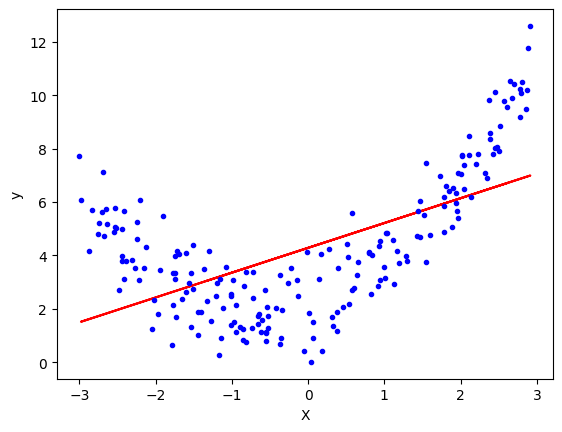

In [301]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [302]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [303]:
print(X_train[0])
print(X_train_trans[0])

[2.60999369]
[1.         2.60999369 6.81206706]


In [304]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [305]:
y_pred = lr.predict(X_test_trans)

In [306]:
r2_score(y_test,y_pred)

0.8675376605127104

In [307]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.8838427  0.75037445]]
[2.08331439]


In [ ]:
class custom_polynomial_regression:
    
    def __init__(self,epochs = 100,learning_rate = 0.01 , degree = 2):
       
        self.degree = degree 
        self.learning_rate = learning_rate    
        
        self.epochs = epochs 
        self.intercept = None 
        
        self.coef = None
        
        
    def fit_transform(self ,x_train):
        
        x_train = x_train.ravel()
        x_train_transformed = np.array([1,x_train[0],x_train[0]*x_train[0]])
        for i in range(1,x_train.shape[0]) :
            x_train_transformed = np.vstack((x_train_transformed,[1,x_train[i] , x_train[i]*x_train[i]]))
        
        return x_train_transformed
    
    def fit(self , x_train , y_train):
        # Here we are using stochastic gradient descent
        # initializing
        self.intercept = 0
        self.coef = np.ones(x_train.shape[1] - 1) 
        
        for i in range(self.epochs) :
            for j in range(x_train.shape[0]) :
                
                idx = np.random.randint(0,x_train.shape[0])
                
                y_hat = np.dot(x_train[idx][1:],self.coef) +  self.intercept
                
                intercept_dir = (-2)*(y_train[idx] - y_hat) 
                self.intercept = self.intercept - (self.learning_rate * intercept_dir)
                
                
                coef_dir = -2 * np.dot((y_train[idx] - y_hat),x_train[idx][1:].reshape(1,2))
                self.coef = self.coef - (self.learning_rate * coef_dir) 
                
    
    def predict(self , x_test):
            return np.dot(x_test[:,1:],self.coef) + self.intercept
                
        

In [371]:
poly_reg = custom_polynomial_regression()

In [372]:
X_train.shape

(160, 1)

In [373]:
x_train = poly_reg.fit_transform(x_train=X_train)

In [374]:
x_test = poly_reg.fit_transform(X_test)

In [375]:
x_test[:,1:].shape

(40, 2)

In [376]:
x_train[0][1:]

array([2.60999369, 6.81206706])

In [377]:
poly_reg.fit(x_train,y_train)

In [378]:
poly_reg.intercept

array([2.24398539])

In [379]:
poly_reg.coef

array([0.77482283, 0.67048284])

In [380]:
y_pred = poly_reg.predict(x_test)

In [381]:
r2_score(y_test,y_pred)

0.8711098677431262

In [382]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_reg.fit_transform(X_new)
y_new = poly_reg.predict(X_new_poly)

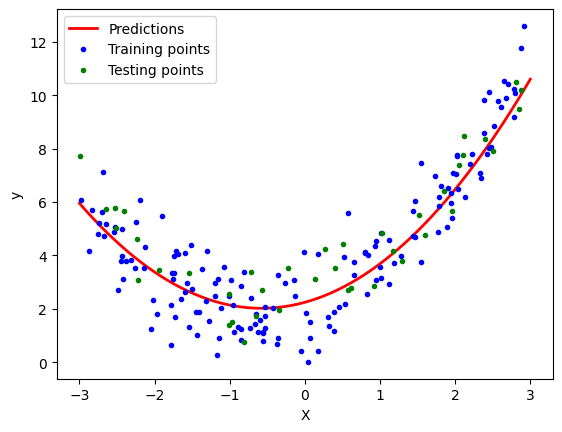